<a href="https://colab.research.google.com/github/lb424/EDA-Housing/blob/main/EDA_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Correlation of Features on Home Prices

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Checking structure of dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning: Handling Missing Data and Data Types

In [ ]:
# Null value check
df.isnull().sum().sort_values(ascending=False)

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# Unique value check to categorize feature types
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


Dataset appears to be clean. There are no null values, and all columns are ready for analysis.

# Data Exploration: Analysis of dataset

In [ ]:
# Label column types
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns
continuous_features = ['area', 'bedrooms', 'bathrooms']

In [ ]:
# Finds frequency of categorical values
for col in categorical_features:
    print(f"{col}:\n{df[col].value_counts()}\n")

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



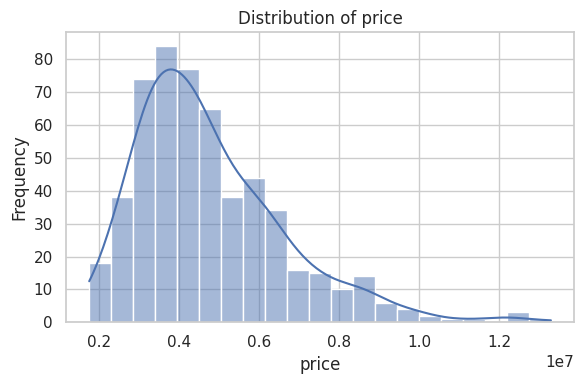

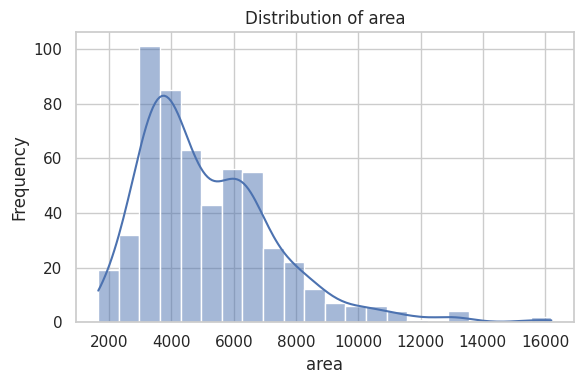

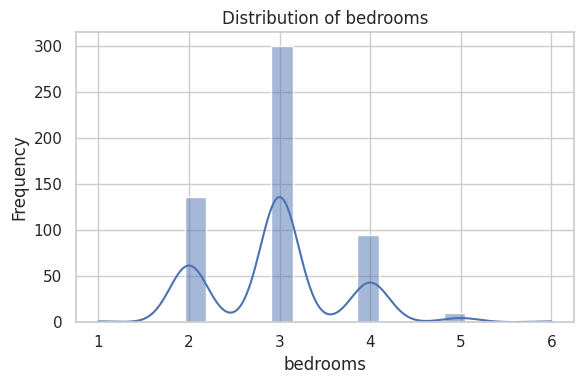

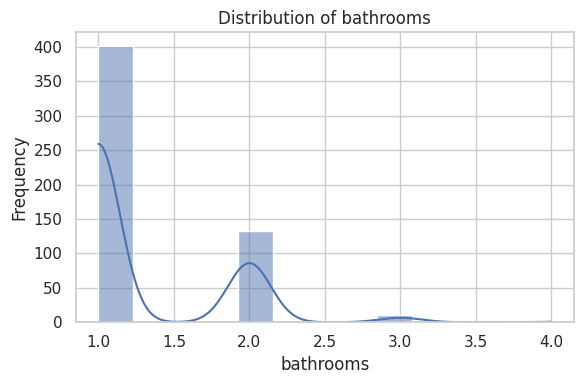

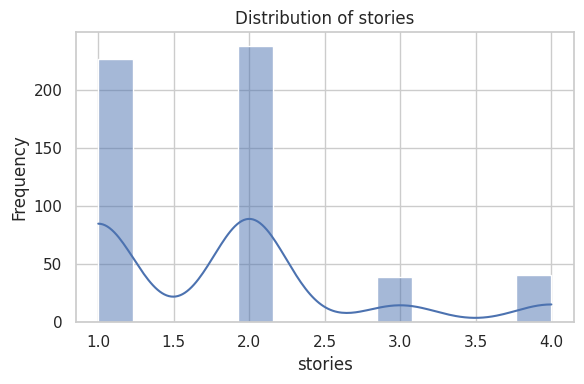

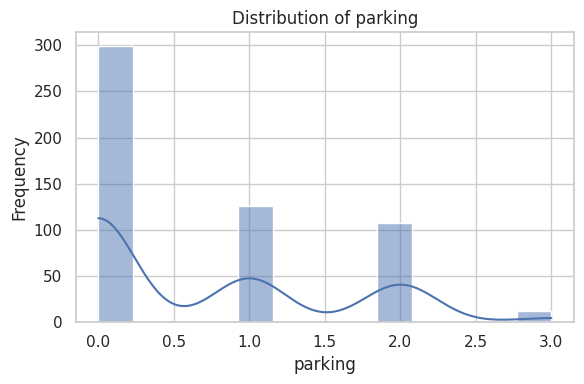

In [ ]:
# Histograms for numerical features: for understanding distribution, skew, and spread
numerical_features = df.select_dtypes(exclude='object').columns
for col in numerical_features:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()



*   Price is right skewed indicating most homes are at a lower price
*   Area is right skewed indicating most homes are at a lower area
*   Price and area have similar distributions, likely because area generally dictates price
*   Most frequent bedrooms are 1-3 with 3 being the most common
*   Most frequent bathrooms are 1 and 2 with 1 being the most common
*   Most frequent # of stories are 1 and 2
*   Most homes offer no parking spots

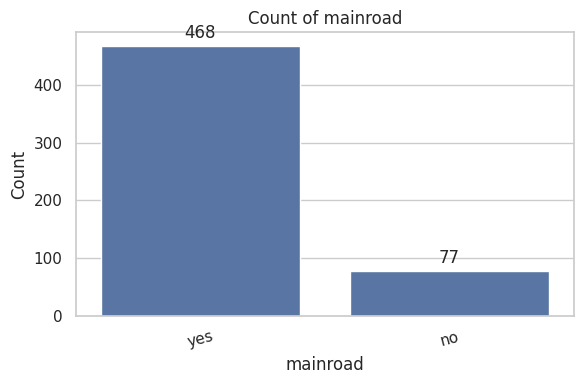

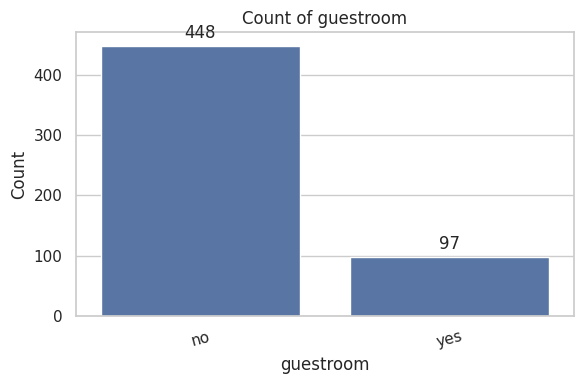

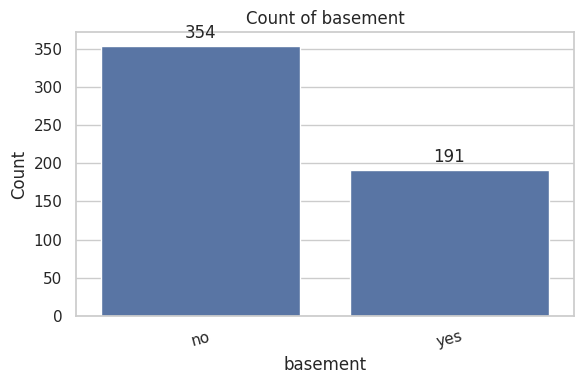

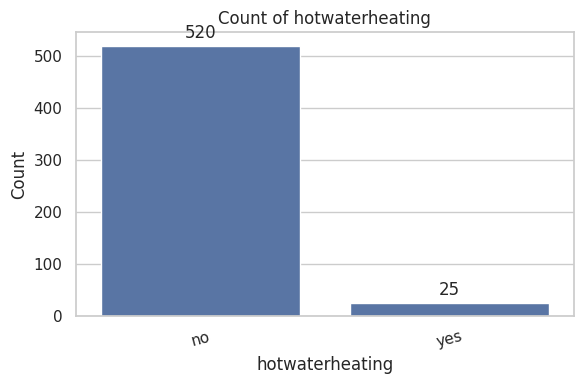

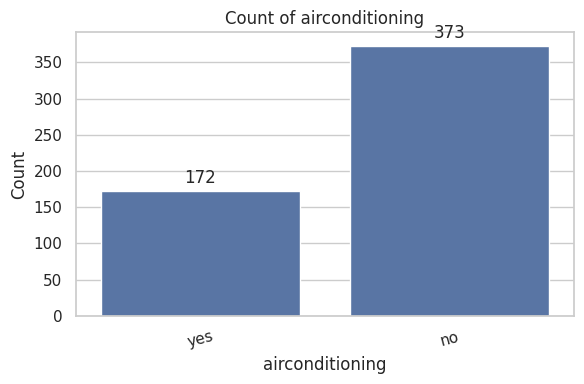

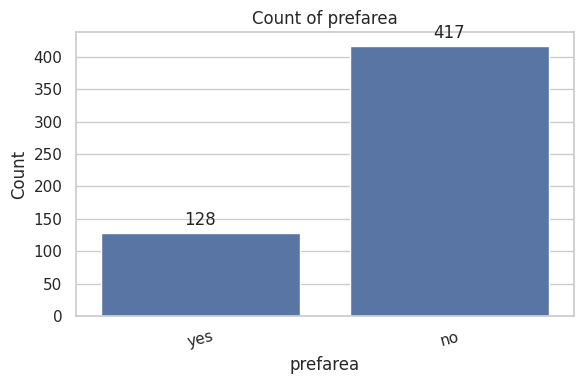

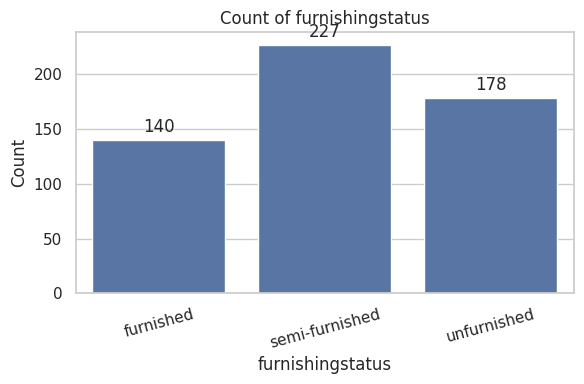

In [ ]:
# Bar charts for categorical features: for understanding distribution and frequency
for col in categorical_features:
  plt.figure(figsize=(6, 4))
  ax = sns.countplot(data = df, x=col)
  plt.title(f'Count of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=15)

  for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3)

  plt.tight_layout()
  plt.show()

In [ ]:
# Finds frequency of categorical values
for col in categorical_features:
    value_counts = df[col].value_counts()
    total = len(df)

    print(f"{col}:\n")
    for value, count in value_counts.items():
        percentage = (count / total) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")
    print("\n")

mainroad:

yes: 468 (85.87%)
no: 77 (14.13%)


guestroom:

no: 448 (82.20%)
yes: 97 (17.80%)


basement:

no: 354 (64.95%)
yes: 191 (35.05%)


hotwaterheating:

no: 520 (95.41%)
yes: 25 (4.59%)


airconditioning:

no: 373 (68.44%)
yes: 172 (31.56%)


prefarea:

no: 417 (76.51%)
yes: 128 (23.49%)


furnishingstatus:

semi-furnished: 227 (41.65%)
unfurnished: 178 (32.66%)
furnished: 140 (25.69%)




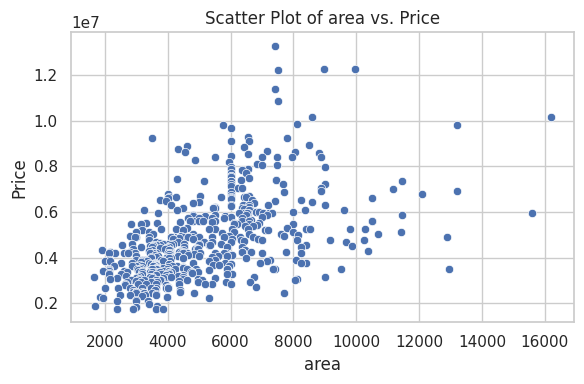

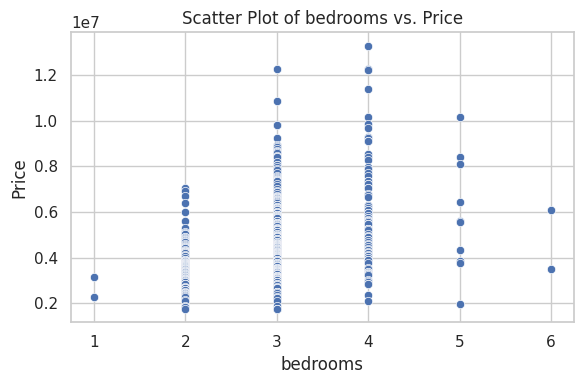

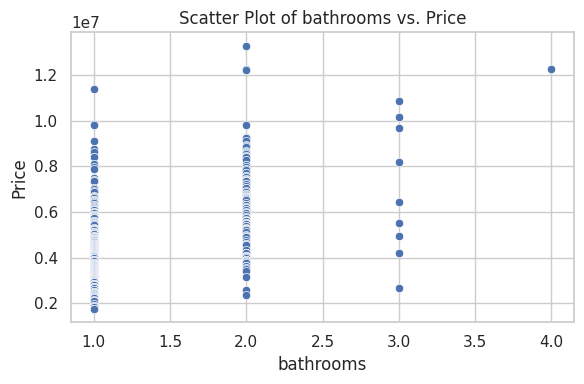

In [ ]:
# Scatter plots for continuous features: for understanding relationship and potential outliers
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'Scatter Plot of {col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

*   Scatter plot shows a strong correlation between area and price, which is to be expected as larger homes generally cost more.
*   Price raises slightly for 1-4 bedrooms, but theres no obvious trend past 4
*   Prices raise slightly for 1 and 2 bathroom homes, but theres no obvious trend past 2



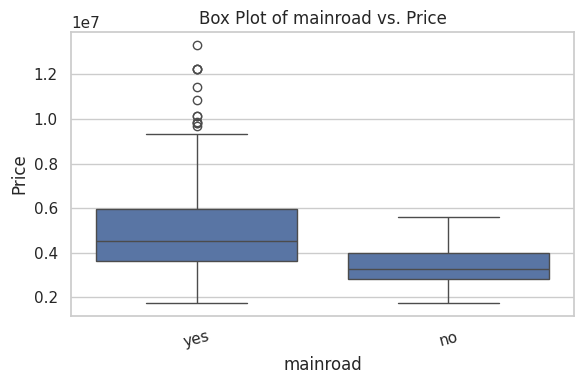

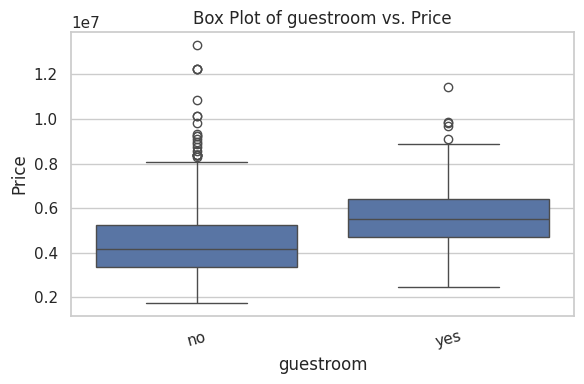

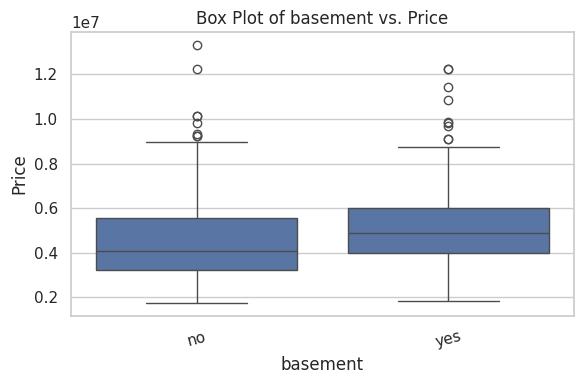

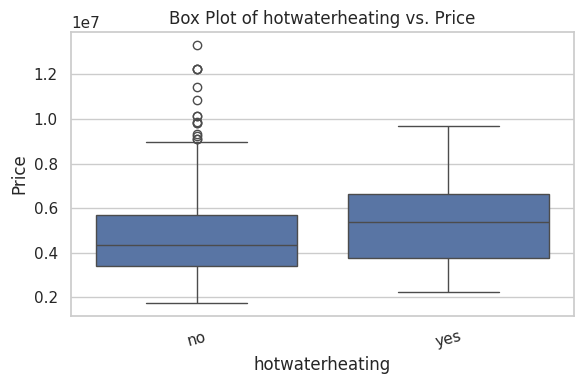

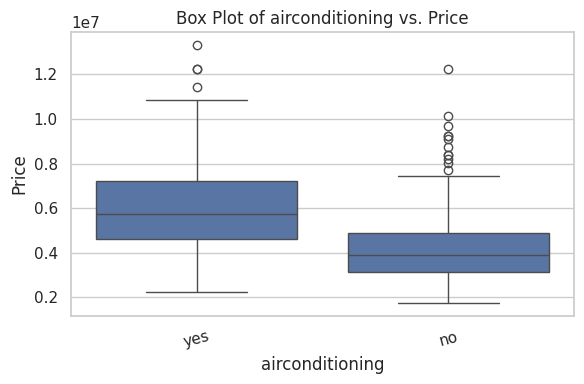

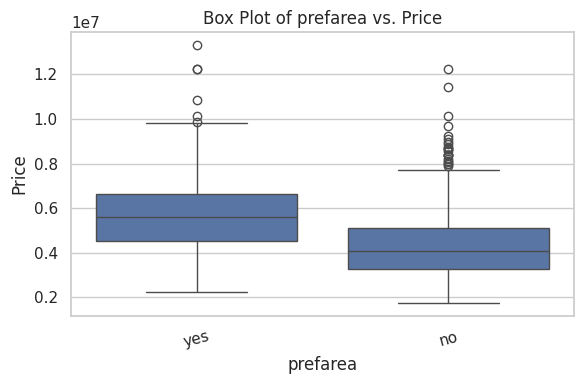

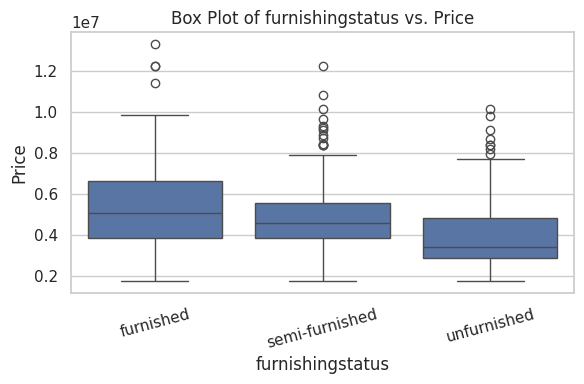

In [ ]:
# Boxplots for categorical features: for understanding distribution and potential outliers
for col in categorical_features:
  plt.figure(figsize=(6, 4))
  sns.boxplot(data=df, x=col, y='price')
  plt.title(f'Box Plot of {col} vs. Price')
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.xticks(rotation=15)
  plt.tight_layout()
  plt.show()

*   Homes with mainroad access have a higher median price
*   Homes with guestrooms have a higher median price and a broader spread
*   Basement has little affect on price
*   Homes with hot water heating and air consitioning both have a much higher median price
*   Furnished homes are generally more expensive

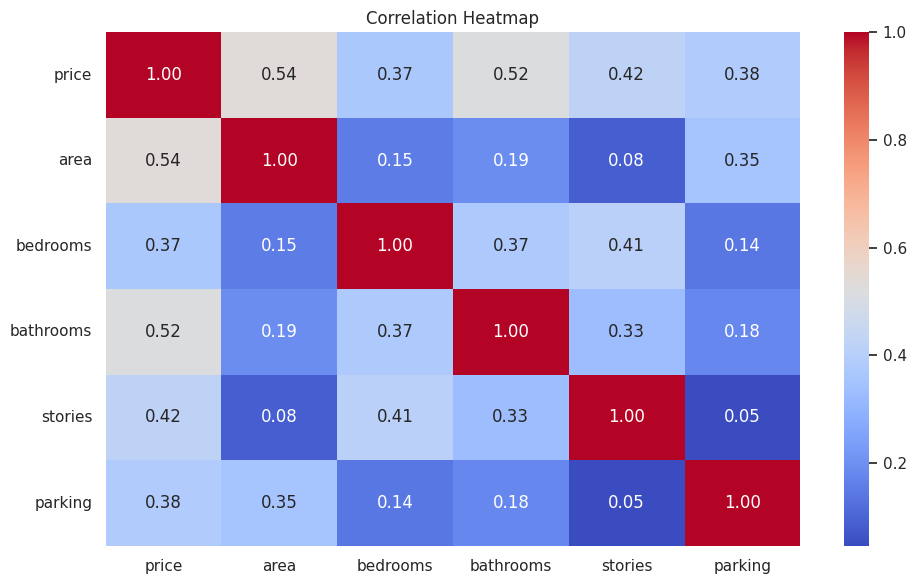

In [ ]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Analysis Highlights: Which home features have the most impact on price?

*   As expected area/ square footage have the highest correlation with price at .54
*   Bathrooms and stories are the next most correlated with price at .52 and .42
*   Bedrooms and parking have a fairly weak correlation with price at .37 and .39

